# Análise de dados em R

O software R possui funcionalidades de análise de dados tal como tabela de dados e métodos de leitura de arquivos locais e remotos. O exemplo abaixo mostra o exemplo da leitura de dados remoto e um resumo dos dados com a função ``summary()``. 

In [1]:
titanic <- read.csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')
summary(titanic)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

Podemos selecionar apenas um subconjunto de colunas da tabela maior como no exemplo abaixo linha 1 onde escrevemos um vírgula ``,`` para selecionar todas as linhas e uma lista de colunas após a vírgula ``Age`` e ``Sex``. As primeiras linhas do dataframe ``idade_sexo`` são impressas com a função ``head()``. 

In [3]:
idade_sexo <- titanic[,c('Age', 'Sex')]
head( idade_sexo )

,Age,Sex
,<dbl>,<chr>
1,22,male
2,38,female
3,26,female
4,35,female
5,35,male
6,NA,male


A consulta sobre dados estatísticos pode ser feito por coluna como abaixo onde as informações de valores mínimo, máximo e média são mostrados para a coluna ``Age``. Cada função tem a opção ``na.rm`` para remover as linhas com dados inexistentes.

In [18]:
min( titanic$Age, na.rm = TRUE )
max( titanic$Age, na.rm = TRUE )
mean( titanic$Age, na.rm = TRUE )

[1] 0.42

[1] 80

[1] 29.69912

Também podemos aplicar testes relacionais e lógicos para selecionar determinadas linhas da tabela como no exemplo. O primeiro exemplo cria a tabela ``acima_35`` com todos os passeiros que tinham idade acima de 35 anos. Depois, a outra seleção cria a tabela ``acima_M_35`` com todos os passageiros acima de 35 anos e do sexo masculino. Note que em ambos os casos usamos operadores relacionados para efeitos de comparação e um operador lógico no segundo exemplo.


In [33]:
acima_35 <- titanic[ titanic$Age > 35, ]
nrow( na.omit(acima_35) )


[1] 217

In [34]:
acima_M_35 <- titanic[ (titanic$Age > 35) & (titanic$Sex == 'male'),]
nrow( na.omit(acima_M_35) )

[1] 144

A geração de gráficos depende do pacote ``ggplot2`` como no exemplo. Primeiro, importamos o pacote com a função ``require()`` que recebe como argumento o nome do pacote. O gráfico exemplo é um histograma baseado na idade dos passageiros. Usamos a opção ``na.rm`` para ``TRUE`` para remover as linhas com dados inexistentes.

Carregando pacotes exigidos: ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


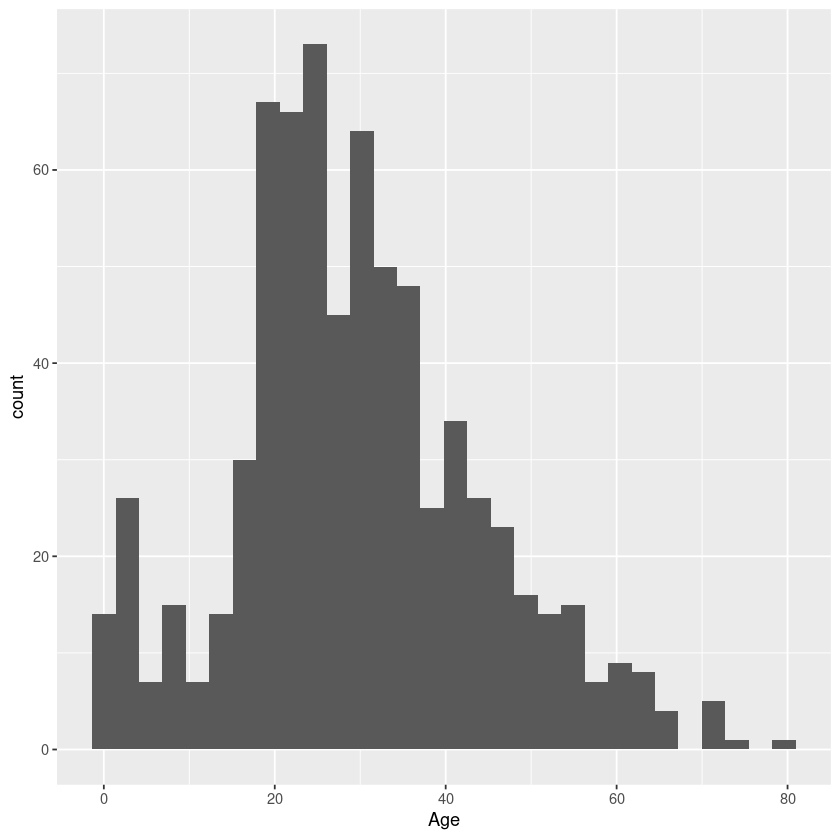

In [4]:
require(ggplot2) 

ggplot(titanic, aes(Age)) +
    geom_histogram(na.rm = TRUE)

Podemos usar o ``ggplot2`` para criar um gráfico de barras para mostrar dados sobre o sexo dos passageiros com ``geom_bar()``.

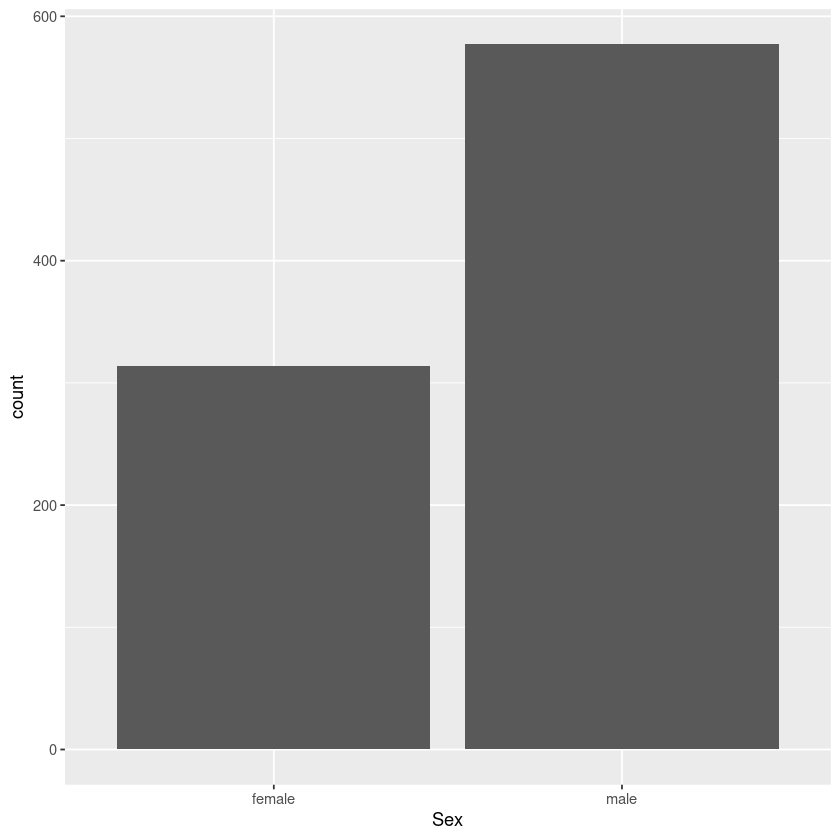

In [6]:
ggplot(titanic, aes(Sex)) +
    geom_bar(na.rm = TRUE)

Podemos visualizar quantos passagens sobreviram com a coluna ``Survived``. Para tanto, devemos usar o pacote ``dplyr`` que importa uma gramática para análise e manipulação de dados. Os dados são direcionados a outras funções pelo operador ``%>%``. No exemplo abaixo, usamos o método ``group_by()`` para agrupar pela coluna ``Survived`` e realizamos operações de sumário com ``sumarise()`` tais como a contagem ``n()``.

In [9]:
require(dplyr)

titanic %>%
    group_by(Survived) %>%
    summarise(
        n = n()
    )

Survived,n
<int>,<int>
0,549
1,342


Podemos visualizar quantos passagens sobreviram com a coluna ``Survived``. Para tanto, agrupamos os valores para contagem e em seguida calculamos a divisão salvando no dataframe ``sobreviventes``.

In [12]:
sobreviventes <- titanic %>%
    group_by(Survived) %>%
    summarise(
        n = n()
    )
sobreviventes['perc'] <- sobreviventes$n / sum(sobreviventes$n)
sobreviventes

Survived,n,perc
<int>,<int>,<dbl>
0,549,0.6161616
1,342,0.3838384


O gráfico de pizza abaixo usa opções adicionais pois o ``ggplot2`` não possui um tipo de gráfico análogo ao gráfico em Pandas. A definição do gráfico é usando ``geom_bar`` em conjunto com ``coord_polar``.

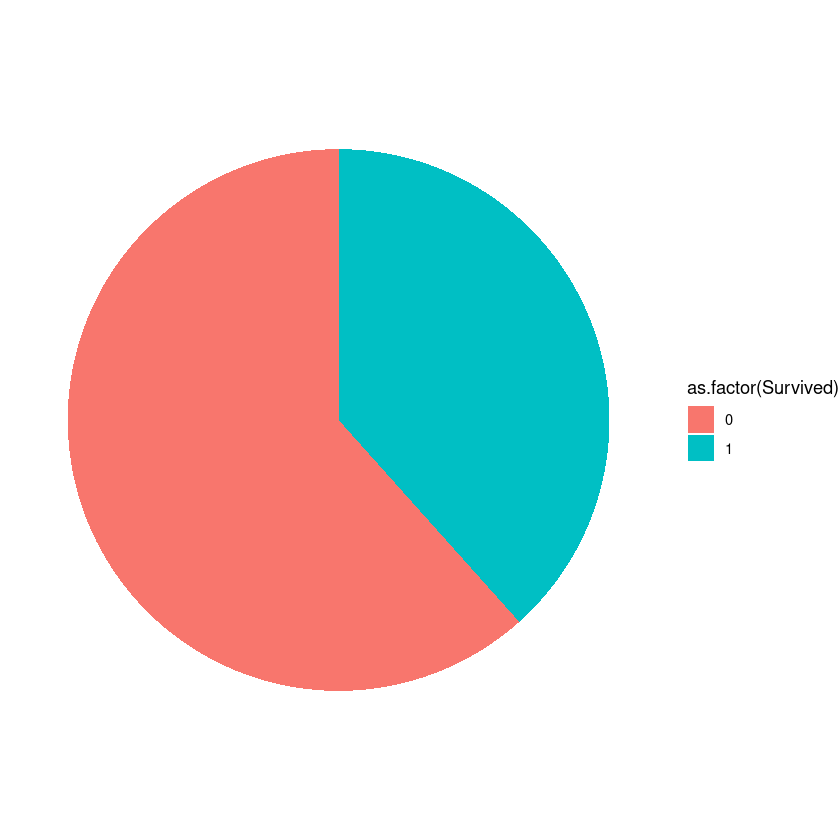

In [20]:
ggplot(sobreviventes, aes(x='', y=perc, fill=as.factor(Survived))) +
    geom_bar(stat="identity", width=1)  +
    coord_polar("y", start=0) +
    theme_void()